# Controlling Plot Aesthetics

- order: 6

 **Since v2024.03.29, swarmplots are, by default, plotted asymmetrically to the right side. For detailed information, please refer to [Swarm Side](#changing-swarm-side)**

 **Since v2024.XX.XX, further aesthetic changes were added which include:**
 - Swarm bars - On by default in swarmplots
 - Contrast bars - On by default in all plots
 - Summary bars
 - Delta text - On by default in all plots
 - Gridkey
  
By default, Swarm bars are included in swarmplots. Contrast bars are, by default, included in all plots. Summary bars are not turned on by default. 

**For detailed information, please refer to [Swarm, Contrast, and Summary bars](#Swarm-bars,-Contrast-bars,-and-Summary-bars), [Delta text](#Delta-text), and [Gridkey](#Gridkey)**


In [ ]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore") # to suppress warnings related to points not being able to be plotted due to dot size

In [ ]:
from scipy.stats import norm # Used in generation of populations.

np.random.seed(9999) # Fix the seed to ensure reproducibility of results.

Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)
t4 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
t5 = norm.rvs(loc=3.25, scale=0.4, size=Ns)
t6 = norm.rvs(loc=3.25, scale=0.4, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
                   'Gender'    : gender, 'ID'  : id_col
                  })

np.random.seed(9999) # Fix the seed so the results are replicable.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()


genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 


# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)

## Changing y-axes labels

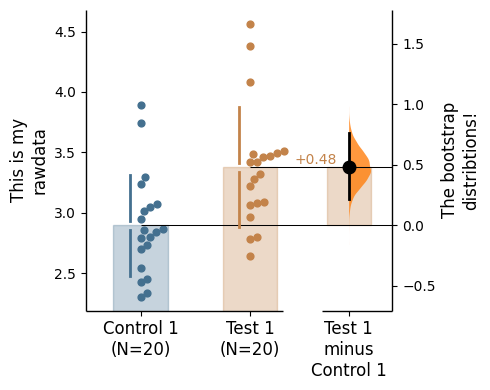

In [ ]:
two_groups_unpaired.mean_diff.plot(swarm_label="This is my\nrawdata",
                                       contrast_label="The bootstrap\ndistribtions!");

## Changing the graph colours

### Colour categories from another variable
Use the parameter `color_col` to specify which column in the dataframe will be used to create the different colours for your graph.

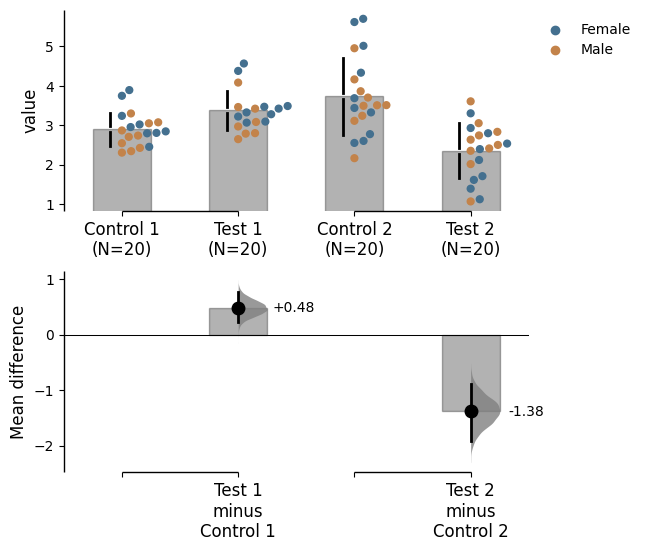

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),
                                         ("Control 2", "Test 2")
                                       ))
multi_2group.mean_diff.plot(color_col="Gender");

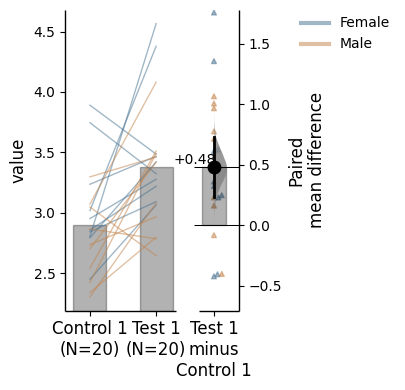

In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")
two_groups_paired_baseline.mean_diff.plot(color_col="Gender");

### Adding a custom palette
The colour palette for the graph can be changed using the parameter `custom_palette`. All values from matplotlib or seaborn color palettes are accepted.

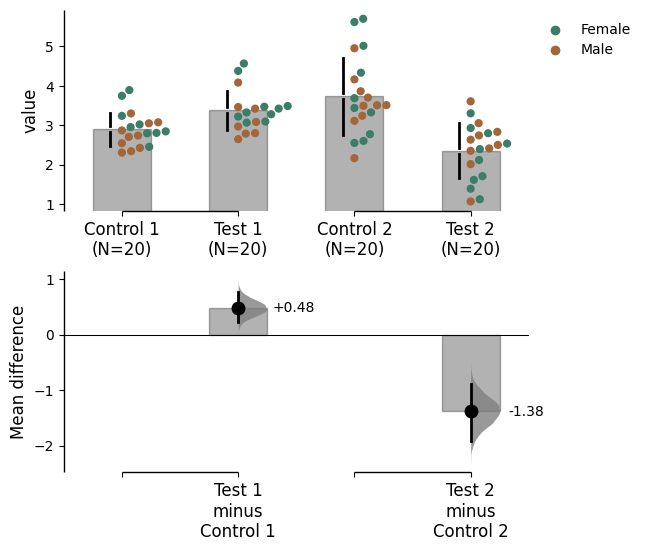

In [ ]:
multi_2group.mean_diff.plot(color_col="Gender", custom_palette="Dark2");

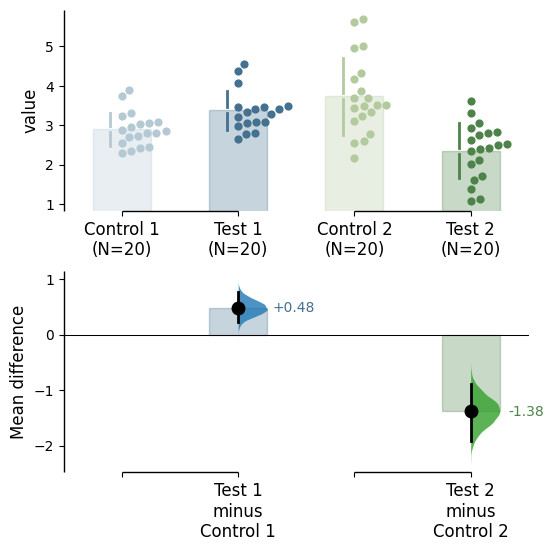

In [ ]:
multi_2group.mean_diff.plot(custom_palette="Paired");

Additionally, a customized color palette can be defined by creating a dictionary where the keys are group names, and the values are valid matplotlib colours.

There are [many ways](https://matplotlib.org/users/colors.html) to specify matplotlib colours. Find one example below using accepted colour names, hex strings (commonly used on the web), and RGB tuples.

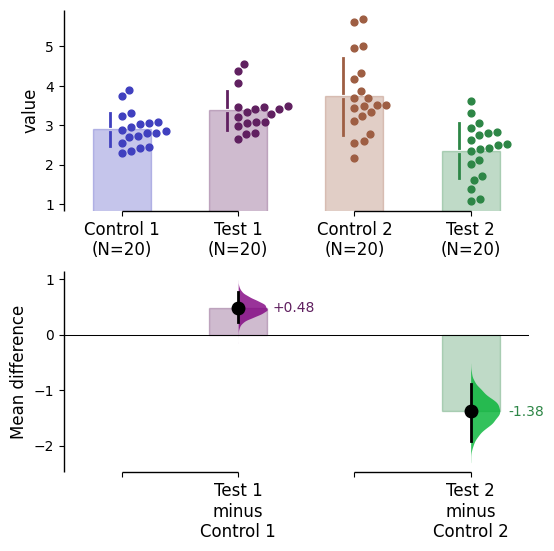

In [ ]:
my_color_palette = {"Control 1" : "blue",
                        "Test 1"    : "purple",
                        "Control 2" : "#cb4b16",     # This is a hex string.
                        "Test 2"    : (0., 0.7, 0.2) # This is a RGB tuple.
                       }

multi_2group.mean_diff.plot(custom_palette=my_color_palette);

## Changing colour saturation

By default, ``dabest.plot()`` [desaturates](https://en.wikipedia.org/wiki/Colorfulness#Saturation)
the colour of the dots in the swarmplot by 50%. This draws attention to the effect size bootstrap curves.

You can alter the default values with the parameters ``swarm_desat`` and ``halfviolin_desat``.


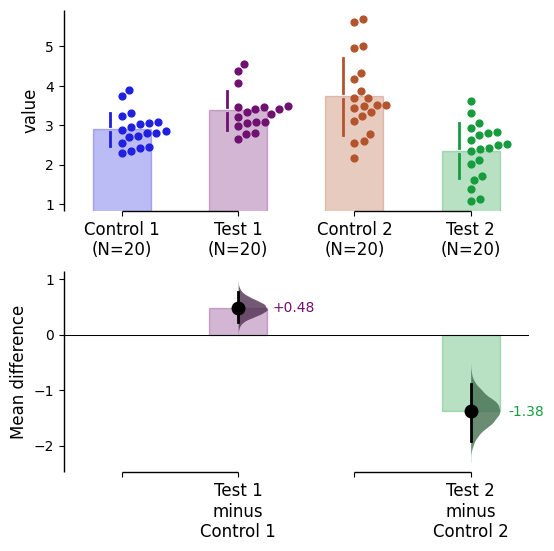

In [ ]:
multi_2group.mean_diff.plot(custom_palette=my_color_palette,
                                swarm_desat=0.75,
                                halfviolin_desat=0.25);

## Changing size
It is possible change the size of the dots used in the rawdata swarmplot, as well as those to indicate the effect sizes, by using the parameters `raw_marker_size` and `es_marker_size` respectively.


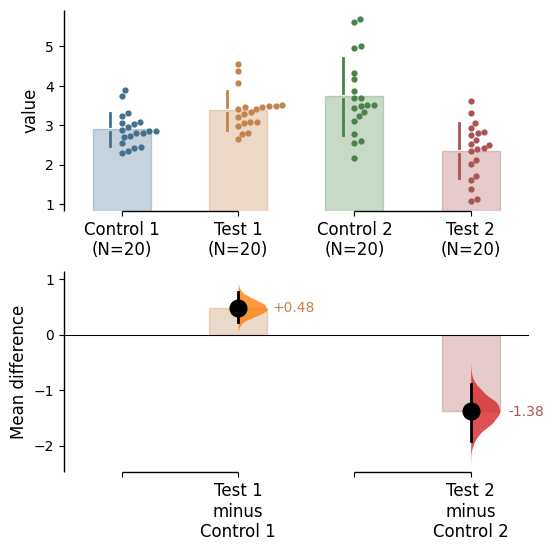

In [ ]:
multi_2group.mean_diff.plot(raw_marker_size=3,
                                es_marker_size=12);

## Changing axes

To change the y-limits for the rawdata axes, and the contrast axes, use the parameters `swarm_ylim` and `contrast_ylim`.

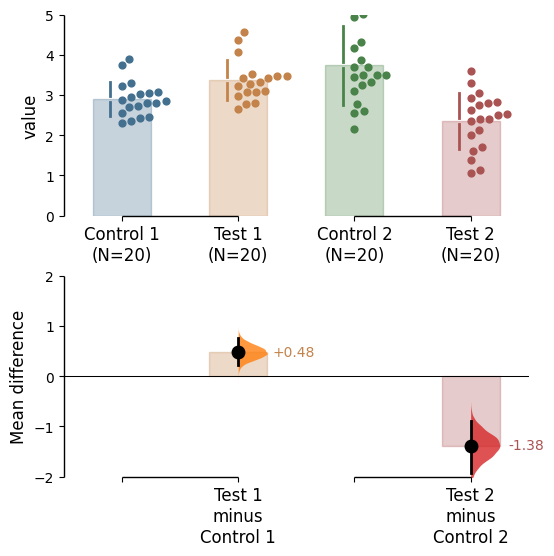

In [ ]:
multi_2group.mean_diff.plot(swarm_ylim=(0, 5),
                                contrast_ylim=(-2, 2));

If the effect size is qualitatively inverted (ie. a smaller value is a
better outcome), you can simply invert the tuple passed to
``contrast_ylim``.

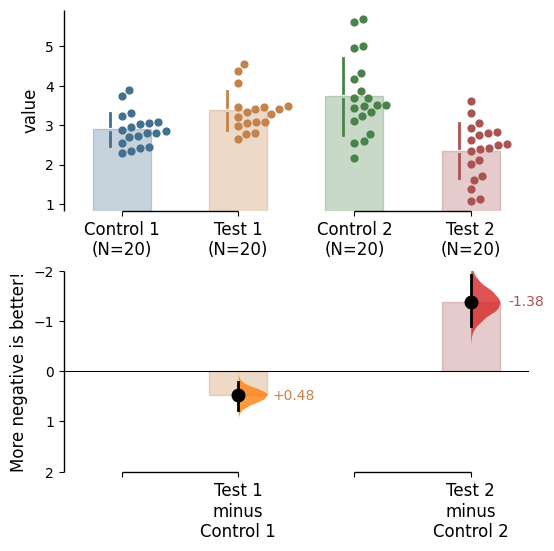

In [ ]:
multi_2group.mean_diff.plot(contrast_ylim=(2, -2),
                                contrast_label="More negative is better!");

The contrast axes share the same y-limits as those of the delta-delta plot. Thus, the y axis of the delta-delta plot changes as well.

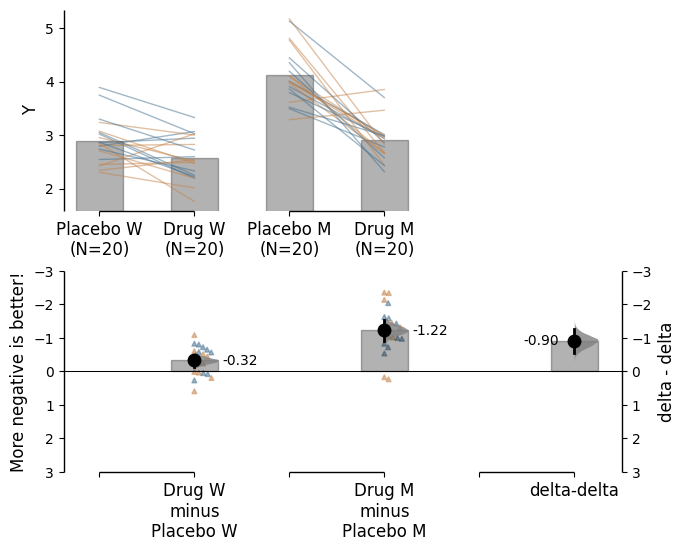

In [ ]:
np.random.seed(9999) # Fix the seed so the results are replicable.

# Create samples
N = 20
y = norm.rvs(loc=3, scale=0.4, size=N*4)
y[N:2*N] = y[N:2*N]+1
y[2*N:3*N] = y[2*N:3*N]-0.5

# Add a `Treatment` column
t1 = np.repeat('Placebo', N*2).tolist()
t2 = np.repeat('Drug', N*2).tolist()
treatment = t1 + t2 

# Add a `Rep` column as the first variable for the 2 replicates of experiments done
rep = []
for i in range(N*2):
    rep.append('Rep1')
    rep.append('Rep2')

# Add a `Genotype` column as the second variable
wt = np.repeat('W', N).tolist()
mt = np.repeat('M', N).tolist()
wt2 = np.repeat('W', N).tolist()
mt2 = np.repeat('M', N).tolist()


genotype = wt + mt + wt2 + mt2

# Add an `id` column for paired data plotting.
id = list(range(0, N*2))
id_col = id + id 


# Combine all columns into a DataFrame.
df_delta2 = pd.DataFrame({'ID'        : id_col,
                  'Rep'      : rep,
                   'Genotype'  : genotype, 
                   'Treatment': treatment,
                   'Y'         : y
                })

paired_delta2 = dabest.load(data = df_delta2, 
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
paired_delta2.mean_diff.plot(contrast_ylim=(3, -3),
                                 contrast_label="More negative is better!");

You can also change the `*y-limits* and *y-label* for the delta-delta plot.

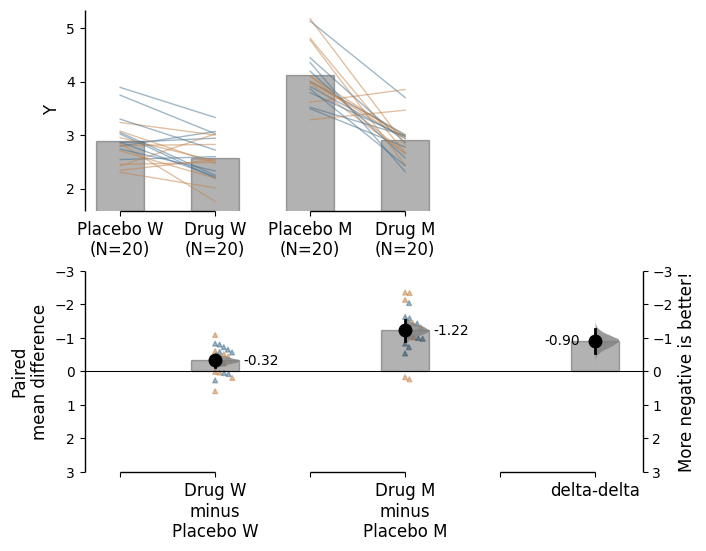

In [ ]:
paired_delta2.mean_diff.plot(delta2_ylim=(3, -3),
                                 delta2_label="More negative is better!");

### Axes ticks
You can add minor ticks and also change the tick frequency by accessing
the axes directly.

Each estimation plot produced by ``dabest`` has two axes. The first one
contains the rawdata swarmplot while the second one contains the bootstrap
effect size differences.


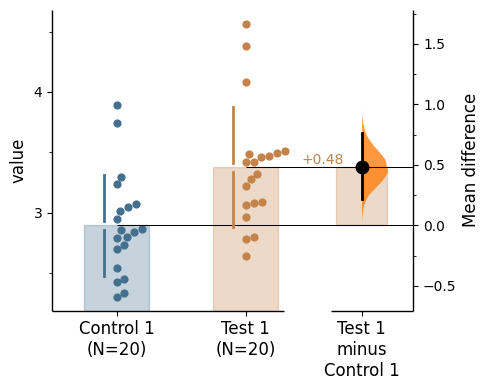

In [ ]:
import matplotlib.ticker as Ticker

f = two_groups_unpaired.mean_diff.plot()

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(1))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.5))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

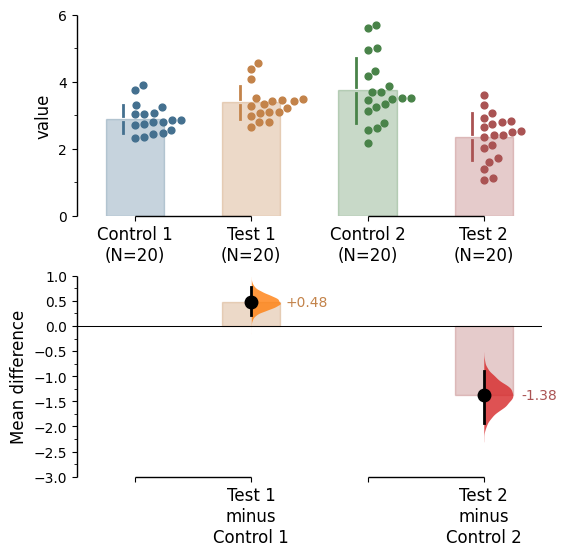

In [ ]:
f = multi_2group.mean_diff.plot(swarm_ylim=(0,6),
                                   contrast_ylim=(-3, 1))

rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

rawswarm_axes.yaxis.set_major_locator(Ticker.MultipleLocator(2))
rawswarm_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(1))

contrast_axes.yaxis.set_major_locator(Ticker.MultipleLocator(0.5))
contrast_axes.yaxis.set_minor_locator(Ticker.MultipleLocator(0.25))

## Changing swarm side
In `dabest`, swarmplots are, by default, plotted asymmetrically to the right side. You may change this by using the parameter `swarm_side`. 

There are only three valid values: "right" (default), "left", "center".

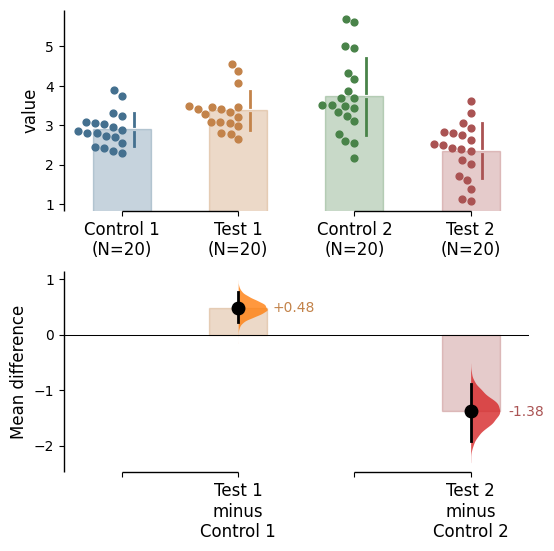

In [ ]:
multi_2group.mean_diff.plot(swarm_side="left");

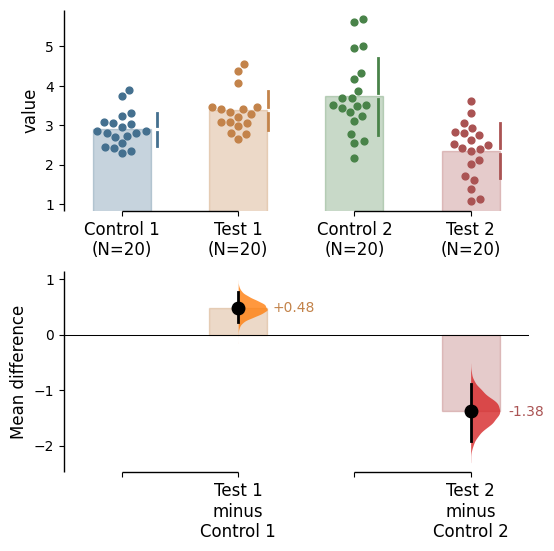

In [ ]:
multi_2group.mean_diff.plot(swarm_side="center");

## Hiding options 
For mini-meta plots, it is possible to hide the weighted average plot by setting the parameter ``show_mini_meta=False`` in the ``plot()`` function.

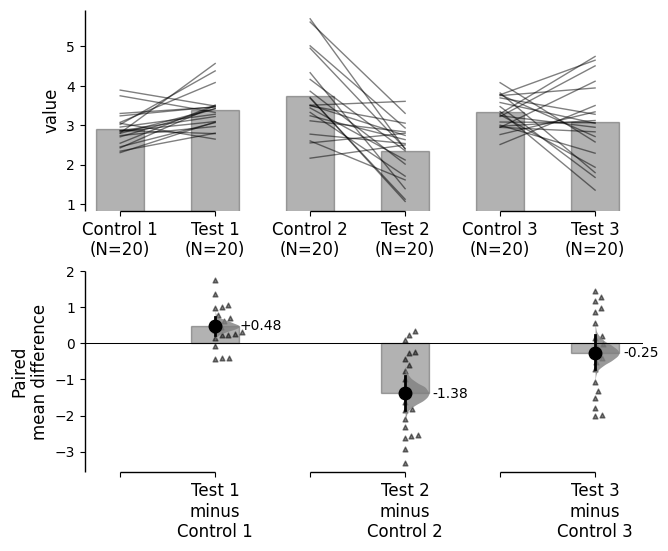

In [ ]:
np.random.seed(9999) # Fix the seed so the results are replicable.
# pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create samples
c1 = norm.rvs(loc=3, scale=0.4, size=Ns)
c2 = norm.rvs(loc=3.5, scale=0.75, size=Ns)
c3 = norm.rvs(loc=3.25, scale=0.4, size=Ns)

t1 = norm.rvs(loc=3.5, scale=0.5, size=Ns)
t2 = norm.rvs(loc=2.5, scale=0.6, size=Ns)
t3 = norm.rvs(loc=3, scale=0.75, size=Ns)


# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Add an `id` column for paired data plotting.
id_col = pd.Series(range(1, Ns+1))

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                   'Control 2' : c2,     'Test 2' : t2,
                   'Control 3' : c3,     'Test 3' : t3,
                   'Gender'    : gender, 'ID'  : id_col
                  })
mini_meta_paired = dabest.load(df, idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), mini_meta=True, id_col="ID", paired="baseline")
mini_meta_paired.mean_diff.plot(show_mini_meta=False);

Similarly, you can also hide the delta-delta plot by setting 
``show_delta2=False`` in the ``plot()`` function.

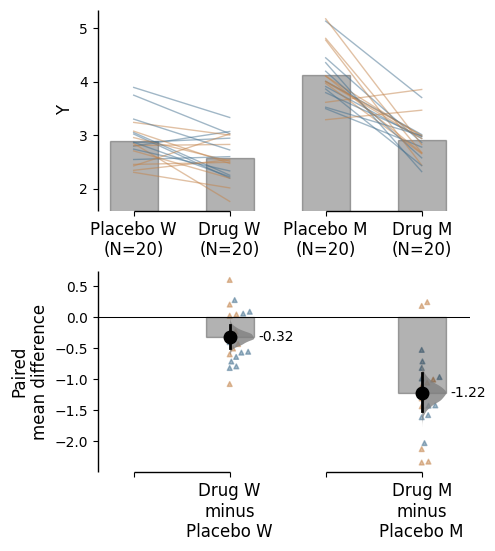

In [ ]:
paired_delta2.mean_diff.plot(show_delta2=False);

## Creating estimation plots in existing axes

*Implemented in v0.2.6 by Adam Nekimken*.

``dabest.plot`` has an ``ax`` parameter that accepts Matplotlib
``Axes``. The entire estimation plot will be created in the specified
``Axes``.


In [ ]:
two_groups_paired_baseline = dabest.load(df, idx=("Control 1", "Test 1"),
                                  paired="baseline", id_col="ID")
multi_2group_paired = dabest.load(df,
                            idx=(("Control 1", "Test 1"),
                                 ("Control 2", "Test 2")),
                            paired="baseline", id_col="ID")

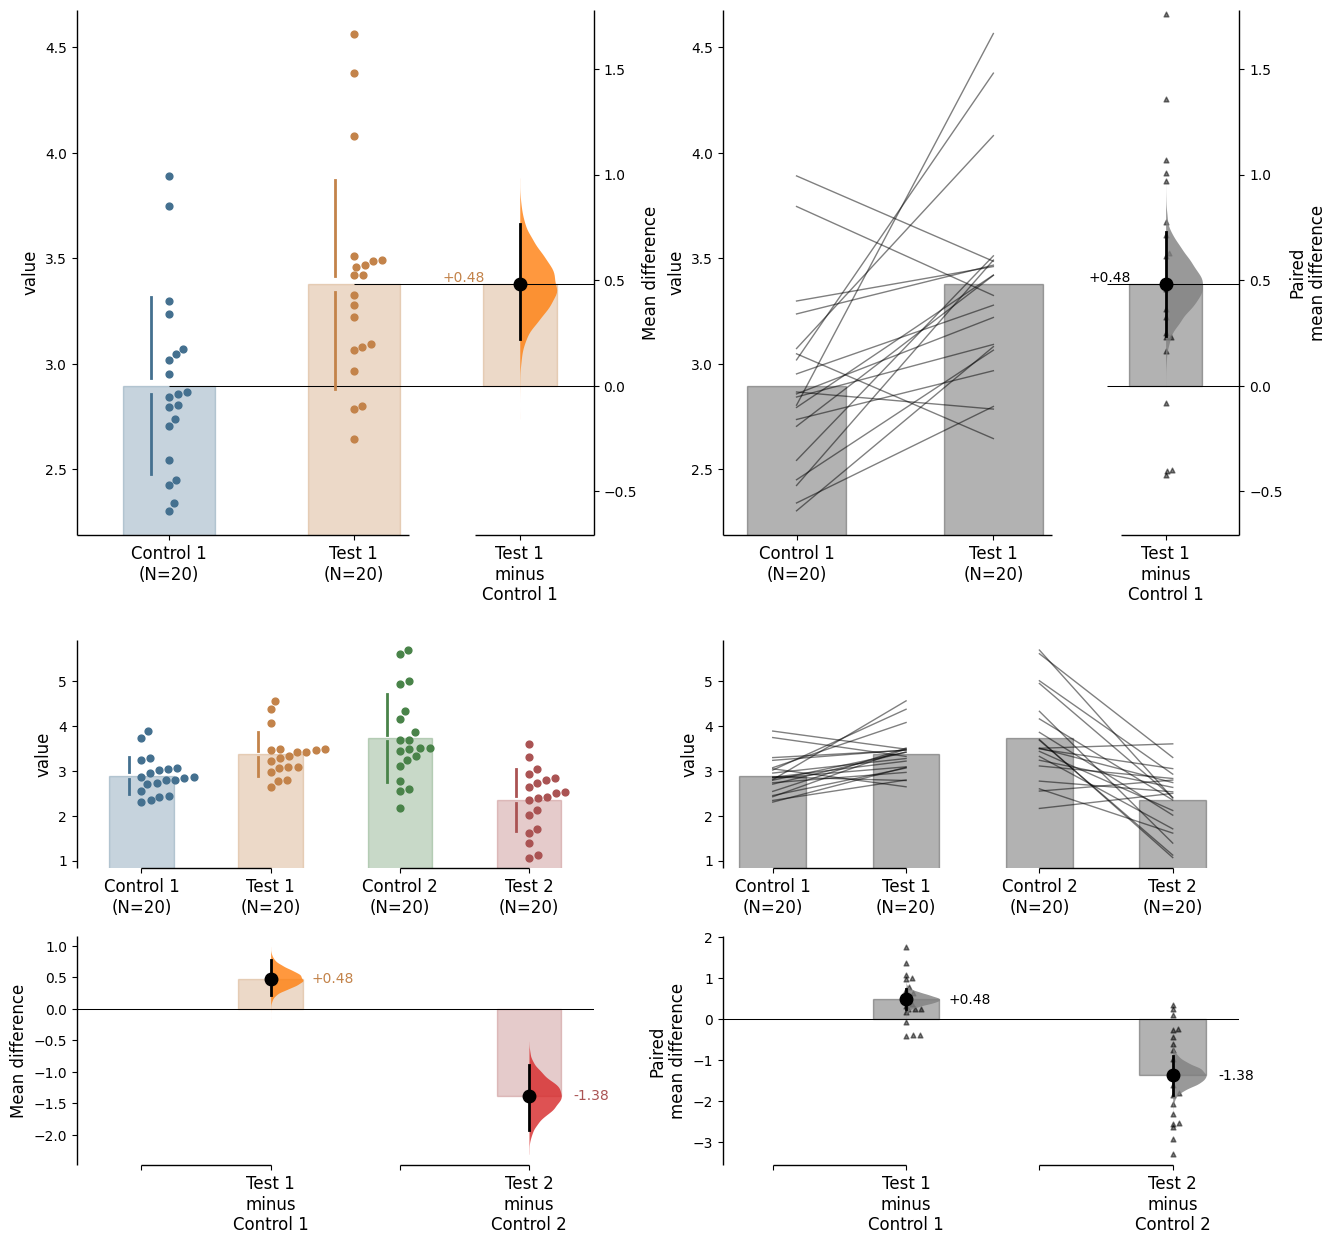

In [ ]:
from matplotlib import pyplot as plt
f, axx = plt.subplots(nrows=2, ncols=2,
                      figsize=(15, 15),
                      gridspec_kw={'wspace': 0.25} # ensure proper width-wise spacing.
                     )

two_groups_unpaired.mean_diff.plot(ax=axx.flat[0]);

two_groups_paired_baseline.mean_diff.plot(ax=axx.flat[1]);

multi_2group.mean_diff.plot(ax=axx.flat[2]);

multi_2group_paired.mean_diff.plot(ax=axx.flat[3]);

In this case, to access the individual rawdata axes, use
``name_of_axes`` to manipulate the rawdata swarmplot axes, and
``name_of_axes.contrast_axes`` to gain access to the effect size axes.

In [ ]:
topleft_axes = axx.flat[0]
topleft_axes.set_ylabel("New y-axis label for rawdata")
topleft_axes.contrast_axes.set_ylabel("New y-axis label for effect size")

Text(642.3472222222223, 0.5, 'New y-axis label for effect size')

## Effect size error bar and marker

Modifying the effect size marker can be done via `es_marker_kwargs`. This parameter accepts a dictionary of keyword arguments.

The available options are:

- 'marker' - type of the marker 
- 'markersize' - size of the marker
- 'color' - color of the marker 
- 'alpha' - alpha of the marker (transparency)
- 'zorder' - zorder of the marker (the layering relative to other plot elements)

**To note:
markersize can also be modified directly via the `es_marker_size` argument**

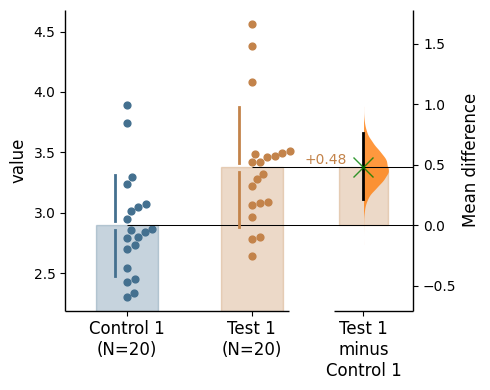

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)
two_groups_unpaired.mean_diff.plot(es_marker_kwargs={"marker": "x", 'markersize': 15, 'color': 'green', 'alpha':0.8, 'zorder': 5});

Modifying the appearance of the effect size error bar can be done via the `es_errorbar_kwargs` parameter. This parameter accepts a dictionary of keyword arguments.

The keywords that can be modified are:

- 'lw' -  width of the error bar
- 'linestyle' - line style of the error bar
- 'color'  - color of the error bar 
- 'zorder' - zorder of the error bar (the layering relative to other plot elements)
- 'alpha' - alpha of the error bar (transparency)

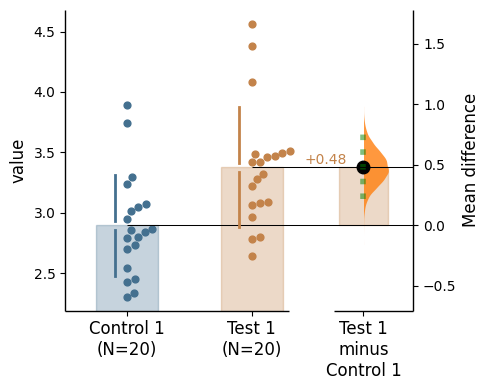

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)
two_groups_unpaired.mean_diff.plot(es_errorbar_kwargs={'lw': 4, 'color': 'green', 'alpha':0.5, 'zorder': 2, 'linestyle': ':'});

## Group Summaries

Group summaries are included in swarmplots by default. These are the gapped lines that represent the mean and the standard deviation of the sample. 

The type of group summary (gapped line) can be specified via `group_summaries` and must be one of these: {'median_quartiles', 'mean_sd', None}.

By default, the group summary is set to `'mean_sd'`.

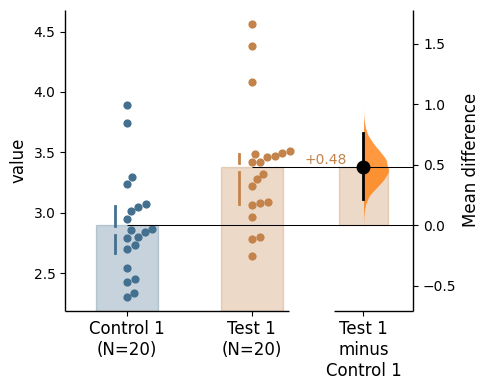

In [ ]:
two_groups_unpaired = dabest.load(df, idx=("Control 1", "Test 1"), resamples=5000)
two_groups_unpaired.mean_diff.plot(group_summaries="median_quartiles");

**Group Summaries** have an associated kwargs `group_summaries_kwargs`

The default values input to `group_summaries_kwargs` are:

- 'zorder': 3, 
- 'lw': 2, 
- 'alpha': 1,
- 'gap_width_percent': 1.5,
- 'offset': 0.1,
- 'color': None

**The default kwargs unpacked:**

`zorder` can be used to specify the zorder of the gapped lines (the layering relative to other plot elements)

`alpha` can be used to specify the alpha of the gapped lines (transparency)

`lw` can be used to specify the linewidth of the gapped lines

`gap_width_percent` can be used to specify the gap size

`offset` can be used to specify the location adjustment of the gapped lines (x-axis)

`color` can be used to specify the shared color of the gapped lines

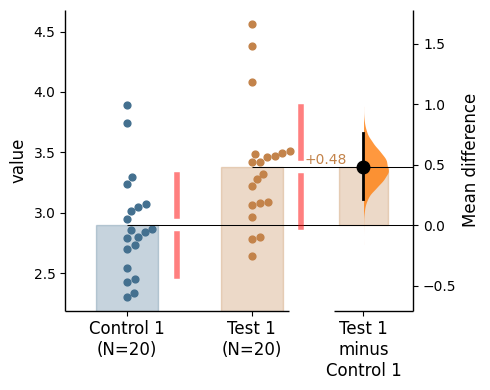

In [ ]:
two_groups_unpaired.mean_diff.plot(group_summaries_kwargs={'gap_width_percent': 3, 'alpha': 0.5, 'lw': 4, 'offset': 0.6, 'color':'red'});

## Swarm bars, Contrast bars, and Summary bars

**Swarm bars** are included in swarmplots by default. It can be turned off by setting `swarm_bars=False` in the `plot()` function.

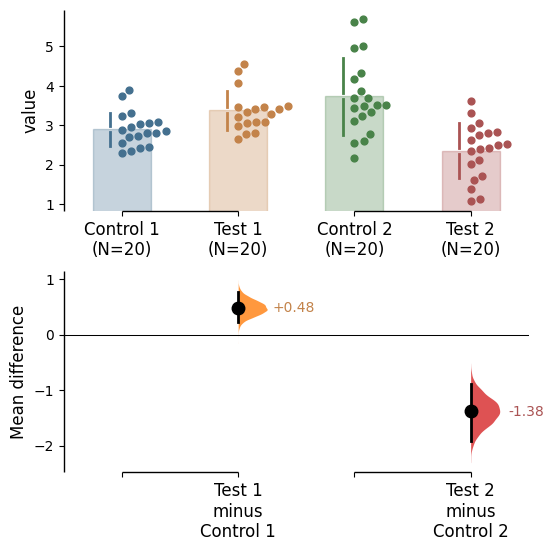

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),
                                         ("Control 2", "Test 2")
                                       ))
multi_2group.mean_diff.plot(swarm_bars=True, contrast_bars=False);

Swarm bar kwargs can be utilised via `swarm_bars_kwargs` in the `plot()` function.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.

If None, the following keywords are passed: 
- 'color': None
- 'alpha': 0.3

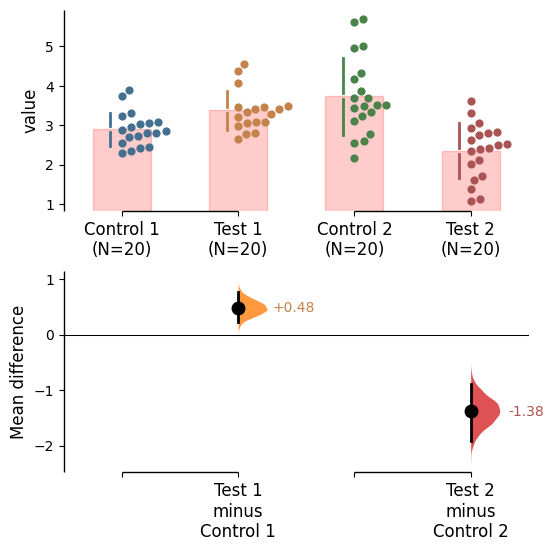

In [ ]:
multi_2group.mean_diff.plot(swarm_bars=True, swarm_bars_kwargs={'color': "red", 'alpha': 0.2}, contrast_bars=False);

**Contrast bars** are included in all plots by default. It can be turned off by setting `contrast_bars=False` in the `plot()` function.

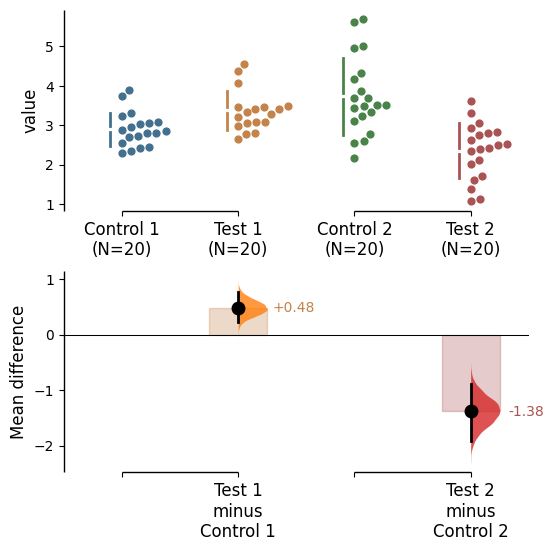

In [ ]:
multi_2group.mean_diff.plot(contrast_bars=True, swarm_bars=False);

Contrast bar kwargs can be utilised via `contrast_bars_kwargs` in the `plot()` function.

Pass any keyword arguments accepted by matplotlib.patches.Rectangle here, as a string.

If None, the following keywords are passed: 
- 'color': None
- 'alpha': 0.3

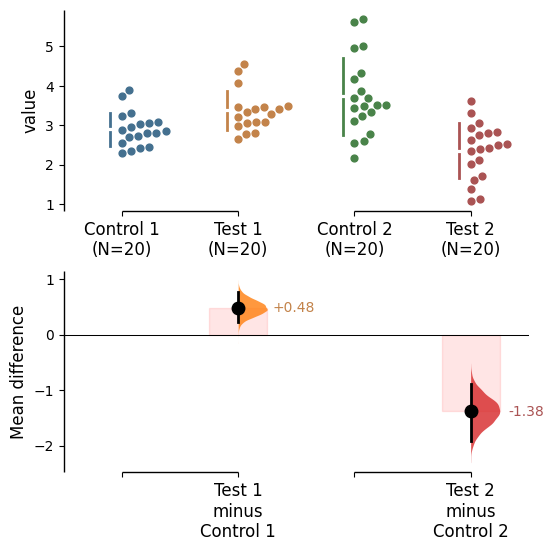

In [ ]:
multi_2group.mean_diff.plot(contrast_bars=True, contrast_bars_kwargs={'color': "red", 'alpha': 0.1}, swarm_bars=False);

A **summary bar** can be added for each relevant contrast object as desired via supplying a list to the argument `summary_bars` in the `plot()` function.

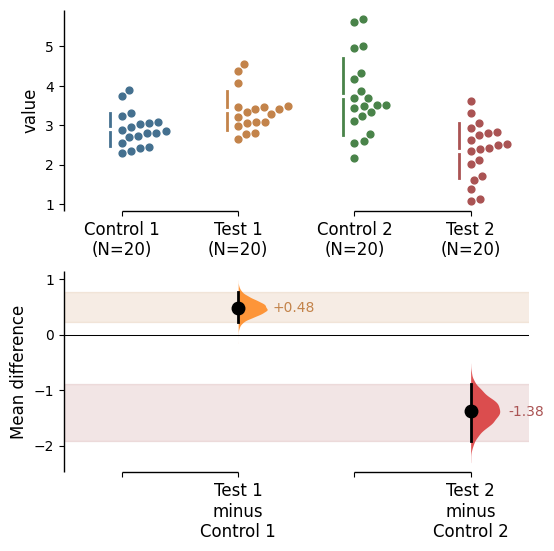

In [ ]:
multi_2group.mean_diff.plot(summary_bars=[0, 1], contrast_bars=False, swarm_bars=False);

Summary bar kwargs can be utilised via `summary_bars_kwargs` in the `plot()` function.
If None, the following keywords are passed: 
- 'color': None
- 'alpha': 0.15

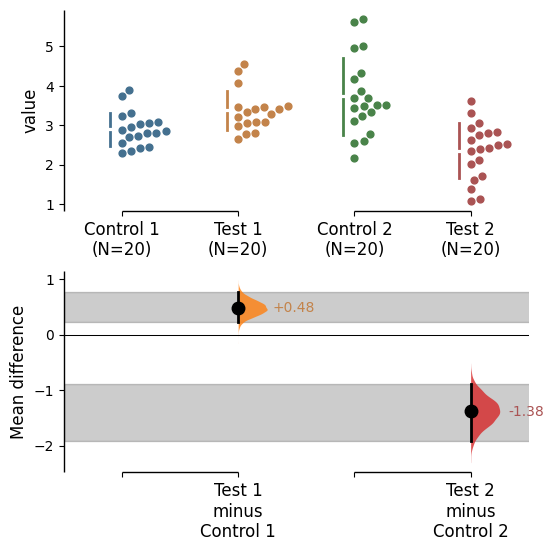

In [ ]:
multi_2group.mean_diff.plot(summary_bars=[0,1], summary_bars_kwargs={"alpha": 0.2, "color": 'black'}, contrast_bars=False, swarm_bars=False);

## Delta text
**Delta text** is included in all plots by default. It can be turned off by setting `delta_text=False` in the `plot()` function.

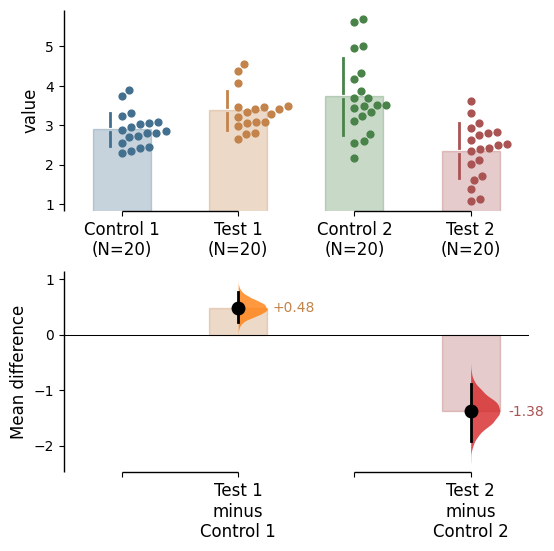

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Test 1"),
                                         ("Control 2", "Test 2")
                                       ))
multi_2group.mean_diff.plot(delta_text=True);

Delta text kwargs can be utilised via `delta_text_kwargs` in the `plot()` function.

Pass any keyword arguments accepted by matplotlib.text.Text here, as a string. 

If None, the following keywords are passed:

- 'color': None, 
- 'alpha': 1, 
- 'fontsize': 10, 
- 'ha': 'center', 
- 'va': 'center', 
- 'rotation': 0, 
- 'x_location': 'right', 
- 'x_coordinates': None, 
- 'y_coordinates': None, 
- 'x_adjust': 0

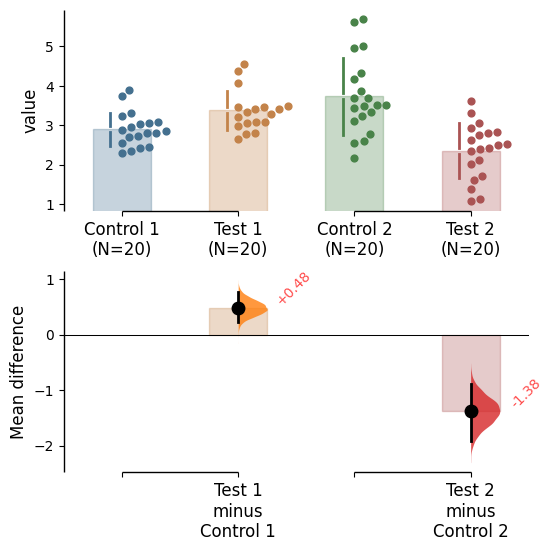

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, delta_text_kwargs={"color":"red", "rotation":45, "va":"bottom", "alpha":0.7});

`'x_coordinates'` and/or `'y_coordinates'` if you would like to specify the text locations manually. 

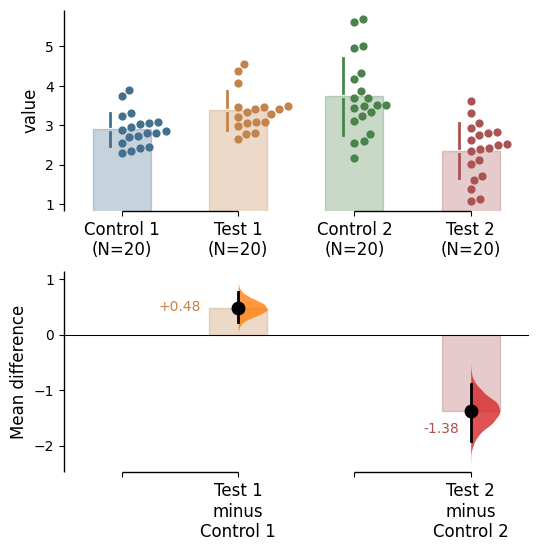

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, delta_text_kwargs={"x_coordinates":(0.5, 2.75), "y_coordinates":(0.5, -1.7)});

`'x_adjust'` to adjust the x location of all the texts (positive moves right, negative left).

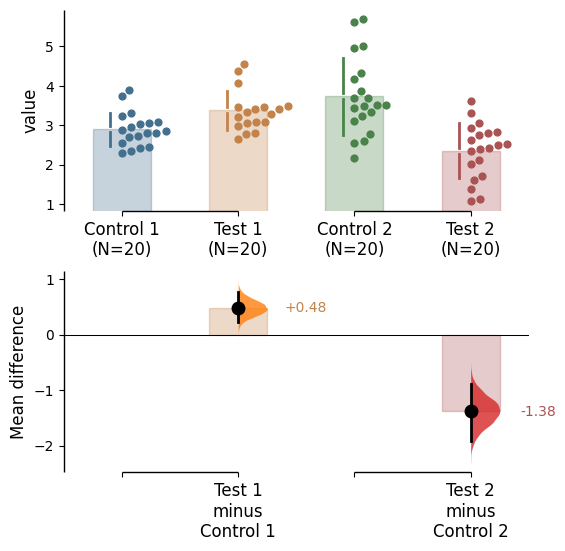

In [ ]:
multi_2group.mean_diff.plot(delta_text=True, delta_text_kwargs={"x_adjust":0.1});

## Adding Jitter to slopegraph plots

For paired plots, you can add jitter to the slopegraph by adding a value for `jitter` in the `slopegraph_kwargs` parameter.

This can be useful for specific paired plots when there are many overlapping points.

Currently, Jitter is only available for slopegraphs and only in the x-direction (vertical plots) or y-direction (horizontal plots).

In [ ]:
# Jitter tests
np.random.seed(9999) # Fix the seed to ensure reproducibility of results.
Ns = 20 # The number of samples taken from each population
# Create samples
c1 = [0.5]*Ns + [1.5]*Ns
c2 = [2]*Ns + [1]*Ns
t1 = [1]*Ns + [2]*Ns
t2 = [1.5]*Ns + [2.5]*Ns
t3 = [2]*Ns + [1]*Ns
t4 = [1]*Ns + [2]*Ns
t5 = [1.5]*Ns + [2.5]*Ns
id_col = pd.Series(range(1, 2*Ns+1))
df_jittertest= pd.DataFrame({'Control 1' : c1,     'Test 1' : t1,
                 'Control 2' : c2,     'Test 2' : t2, 'Test 3' : t3,
                    'Test 4'    : t4,     'Test 5' : t5, 'ID'  : id_col})

For the example below, there are many overlapping points for the paired plot, which makes it look like only one sample.

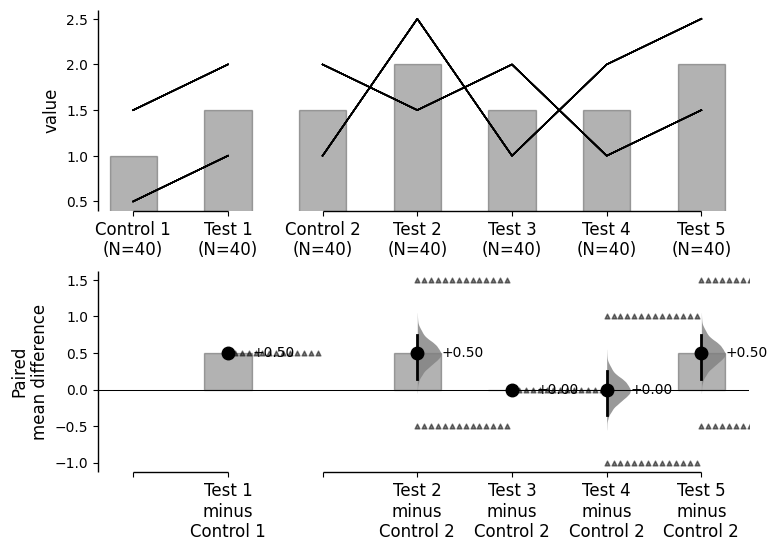

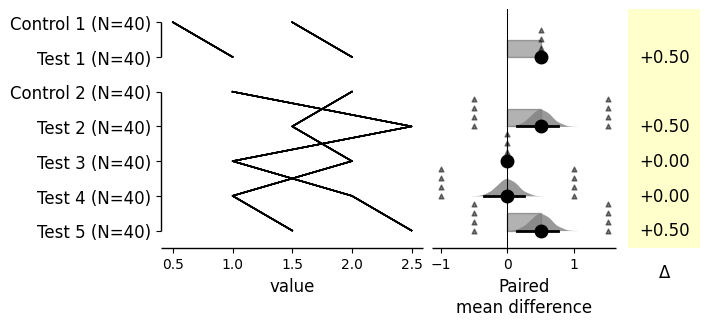

In [ ]:
multi_2group = dabest.load(df_jittertest, idx=(("Control 1", "Test 1"),("Control 2", "Test 2", "Test 3", "Test 4", "Test 5")), paired='baseline', id_col='ID')
multi_2group.mean_diff.plot(horizontal=False);
multi_2group.mean_diff.plot(horizontal=True);

Adding jitter can help to visualize the data better.

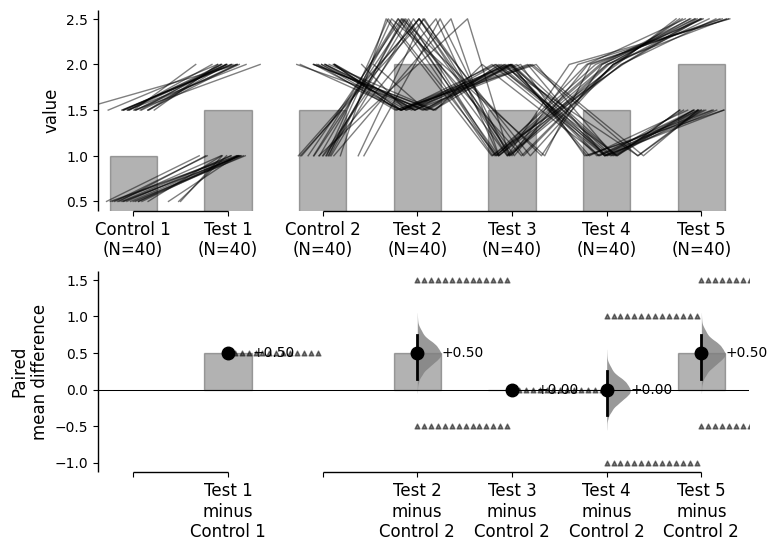

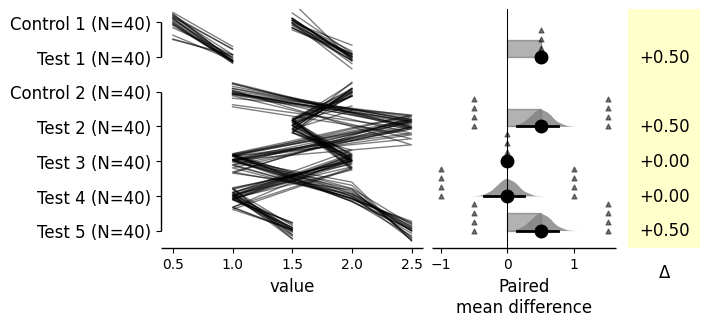

In [ ]:
multi_2group.mean_diff.plot(horizontal=False, slopegraph_kwargs={'jitter': 1});
multi_2group.mean_diff.plot(horizontal=True, slopegraph_kwargs={'jitter': 1});

## Gridkey

You can utilise a gridkey format for representing the index groupings. This can be reached via `gridkey_rows` in the `plot()` function. 

You can either use `gridkey_rows='auto'` to automatically generate the gridkey, or pass a list of indexes to represent the groupings (e.g., `gridkey_rows=['Control', 'Test']`).

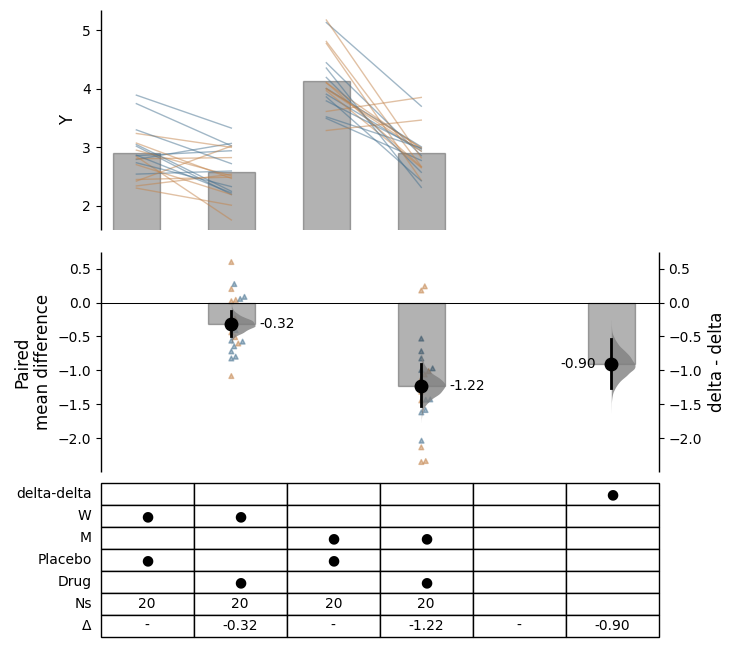

In [ ]:
paired_delta2 = dabest.load(data = df_delta2, 
                                paired = "baseline", id_col="ID",
                                x = ["Treatment", "Rep"], y = "Y", 
                                delta2 = True, experiment = "Genotype")
paired_delta2.mean_diff.plot(gridkey_rows='auto');

Gridkey kwargs can be utilised via `gridkey_kwargs` in the `plot()` function.

The current options are given below:

If None, the following keywords are passed: 
- 'show_es' : True
- 'show_Ns' : True
- 'merge_pairs' : False
- 'delimiters': [';', '>', '_']
- 'marker': '\u25CF'

`'show_es'` and `'show_Ns'` are set to True by default. These can be set to false to remove these rows from the gridkey.

`'merge_pairs'` is set to False by default. This can be set to True to merge the pairs in the gridkey.

`'delimiters'` is set to `[';', '>', '_']` by default. This can be used to specify the delimiters for the autoparser.

`'marker'` is set to `'\u25CF'` by default. This can be used to specify the marker for the gridkey.

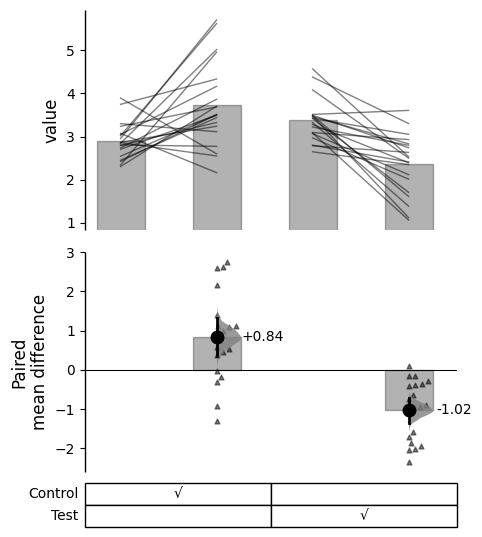

In [ ]:
multi_2group = dabest.load(df, idx=(("Control 1", "Control 2"), ("Test 1", "Test 2")),paired='baseline', id_col='ID')
multi_2group.mean_diff.plot(gridkey_rows=['Control', 'Test'], gridkey_kwargs={'merge_pairs': True, 'show_es': False, 'show_Ns': False, 'marker': '√'});

## Delta Dots

By default, delta dots are included in paired experiment plots (excluding proportion plots). 

This feature can be turned off by setting `delta_dot=False` in the `plot()` function.

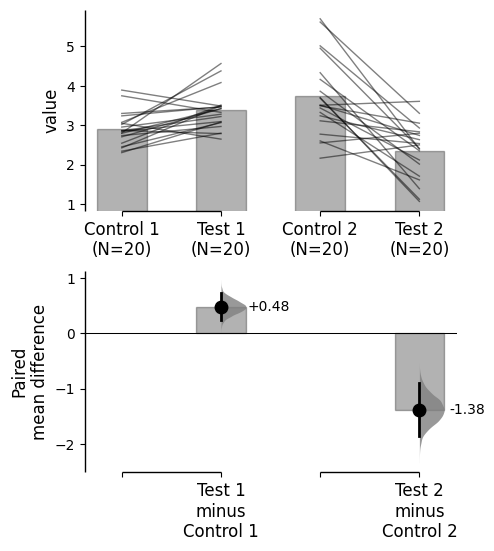

In [ ]:
multi_2group_paired = dabest.load(df, idx=(("Control 1", "Test 1"),
                                         ("Control 2", "Test 2")),paired='baseline', id_col='ID')
multi_2group_paired.mean_diff.plot(delta_dot=False);

Delta dot kwargs can be utilised via `delta_dot_kwargs` in the `plot()` function.

By default, the following keywords are passed:

- 'color': 'k' 
- 'marker': '^' 
- 'alpha': 0.5
- 'zorder': -1
- 'size': 3
- 'side': 'right'

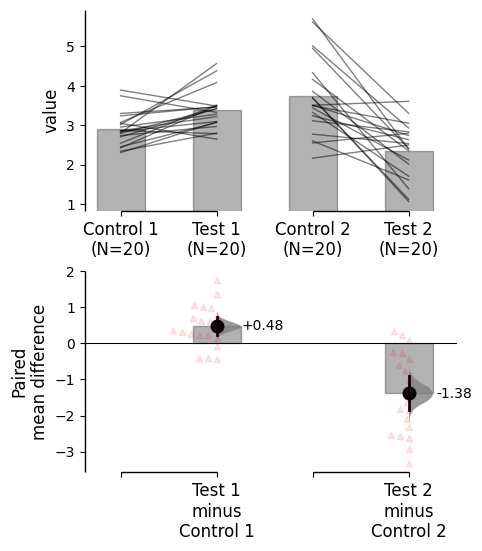

In [ ]:
multi_2group_paired.mean_diff.plot(delta_dot_kwargs={"color":'red', "alpha":0.1, 'zorder': 2, 'size': 5, 'side': 'left'});